In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
import random
from tqdm import tqdm
from ToyMDP import ToyMDP as mdp
from ToyMDP import get_state_id, get_action_id, policy
from algo import q_learning
from utils import plot_q_values

100%|██████████| 500/500 [00:00<00:00, 7090.34it/s]


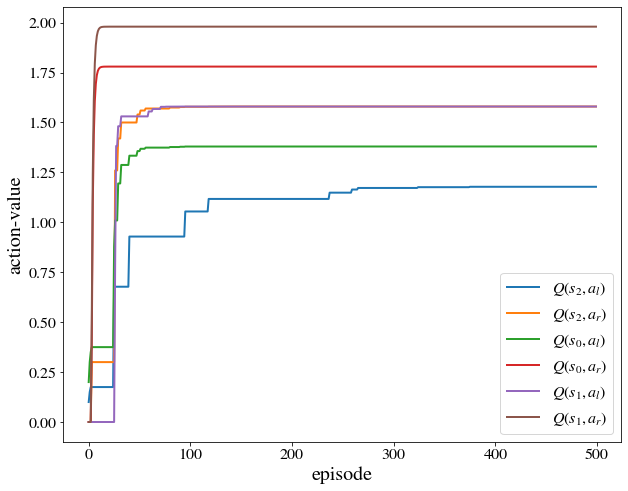

In [7]:
# source
source_reward_weight = [1, 1]
source = mdp(source_reward_weight, uncertain_prob='source')

# train source 
Q_source, r_source, q1, q2, q3, q4, q5, q6 = q_learning(env=source, num_episodes=500, epsilon=0.25)
plot_q_values(Q_source, q1, q2, q3, q4, q5, q6, fname='source')

100%|██████████| 500/500 [00:00<00:00, 6160.25it/s]


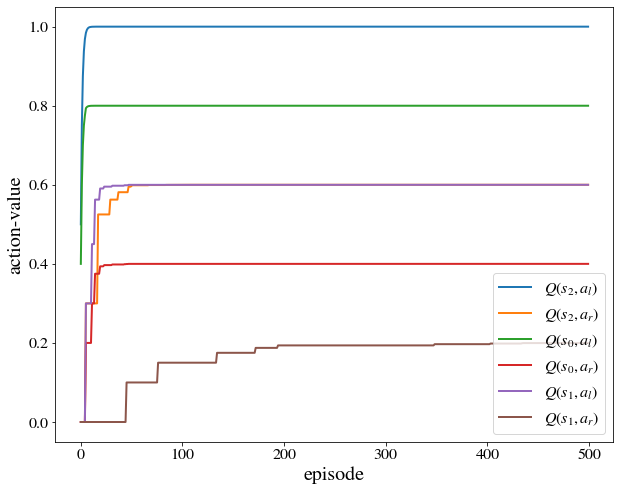

In [3]:
# target
target_reward_weight = [-1, -1]
target = mdp(target_reward_weight, uncertain_prob='source')

# train target 
Q_target, r_target, q1t, q2t, q3t, q4t, q5t, q6t = q_learning(env=target, num_episodes=500, epsilon=0.25)
plot_q_values(Q_target, q1t, q2t, q3t, q4t, q5t, q6t, fname='target')

100%|██████████| 500/500 [00:00<00:00, 4474.46it/s]


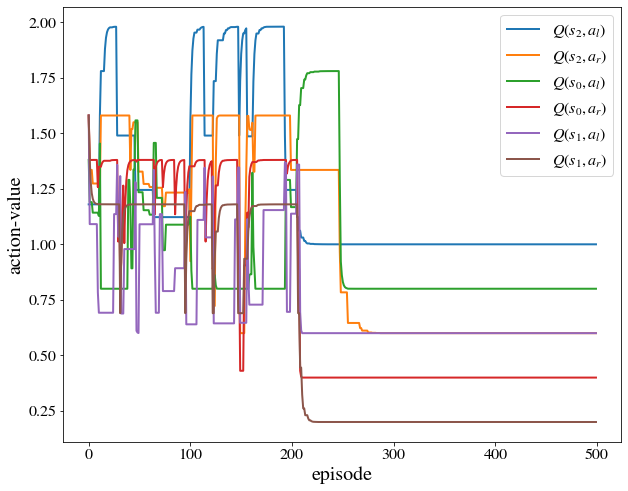

In [4]:
# target
target_reward_weight = [-1, -1]
target = mdp(target_reward_weight, uncertain_prob='source')

# train target 
Q_target1, r_target1, q1t1, q2t1, q3t1, q4t1, q5t1, q6t1 = q_learning(env=target, 
                                                            num_episodes=500, 
                                                            epsilon=0.25, 
                                                            Q_vals=Q_source)
plot_q_values(Q_target1, q1t1, q2t1, 
            q3t1, q4t1, q5t1, 
            q6t1, fname='target_1')

100%|██████████| 500/500 [00:00<00:00, 5534.16it/s]


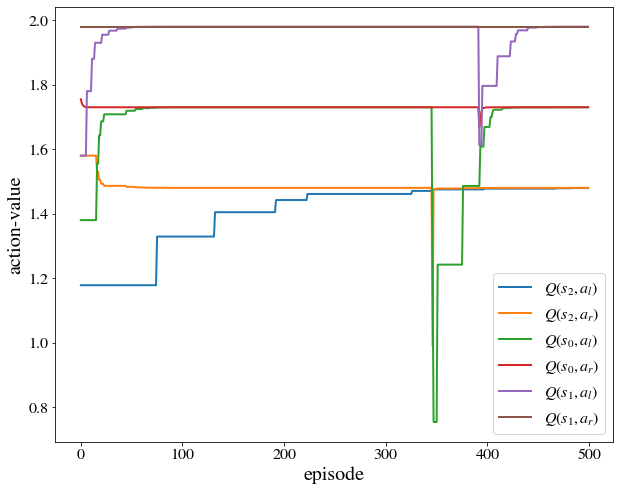

In [9]:
# target
target_reward_weight = [1, 0]
target = mdp(target_reward_weight, uncertain_prob='source')

# train target 
Q_target2, r_target2, q1t2, q2t2, q3t2, q4t2, q5t2, q6t2 = q_learning(env=target, 
                                                            num_episodes=500, 
                                                            epsilon=0.25, 
                                                            Q_vals=Q_source)
plot_q_values(Q_target2, q1t2, q2t2, 
            q3t2, q4t2, q5t2, 
            q6t2, fname='target_1')

100%|██████████| 50/50 [00:00<00:00, 1811.28it/s]


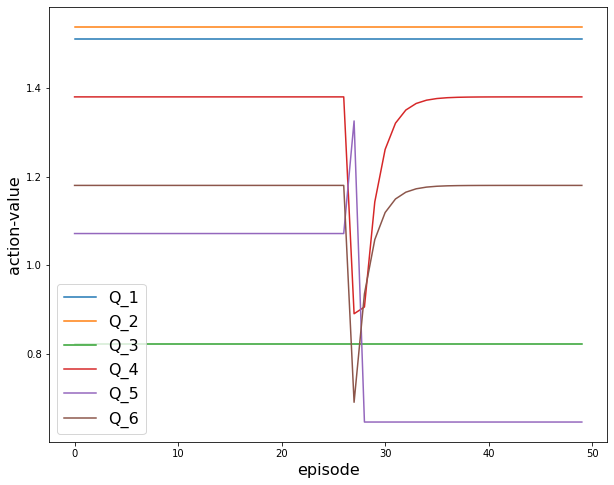

In [10]:
# source
target_reward_weight = [-1, -1]
target = mdp(target_reward_weight, uncertain_prob='source')

Q_target, r_target, q1, q2, q3, q4, q5, q6 = q_learning(env=target, num_episodes=50, epsilon=0.25, Q_vals=Q_source)


plt.figure(figsize=(10, 8))
plt.plot(q1, label='Q_1')
plt.plot(q2, label='Q_2')
plt.plot(q3, label='Q_3')
plt.plot(q4, label='Q_4')
plt.plot(q5, label='Q_5')
plt.plot(q6, label='Q_6')
plt.legend(fontsize=16)
plt.xlabel('episode', fontsize=16)
plt.ylabel('action-value', fontsize=16)
plt.savefig('figures/q_values.png')

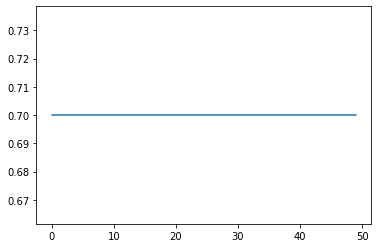

In [60]:
plt.plot(r_target)

state:0, action:1, next_state:1, reward:0.4
state:1, action:1, next_state:2, reward:0.2


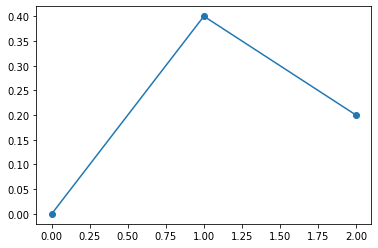

In [20]:
state = source.reset()
done = False
ep_reward = [0]

while not done: 
    action = policy(state, Q_target, epsilon=0.0)
    next_state, reward = target.step(state, action)

    # save reward 
    ep_reward.append(reward)

    if next_state == source.trap or next_state == source.goal:
        done = True

    print(f'state:{state}, action:{action}, next_state:{next_state}, reward:{reward}')
    state = next_state

plt.plot(ep_reward, '-o')
plt.savefig('figures/rewards')